C:\Users\ssp1_\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
Mean Absolute Error: 4181.561524000791
Mean Squared Error: 33600065.355077825
Root Mean Squared Error: 5796.556335884076


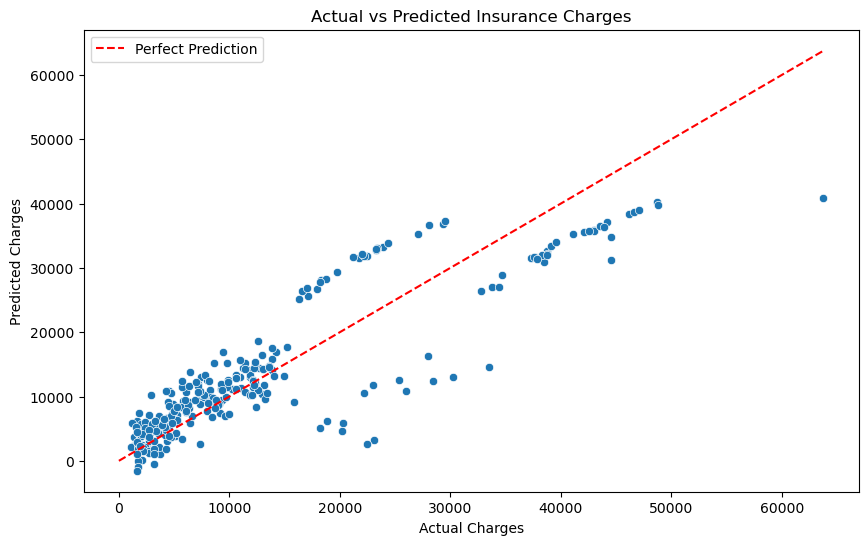

            Feature   Coefficient
4        smoker_yes  23650.312302
2          children    425.641376
1               bmi    337.271473
0               age    256.955959
3          sex_male    -18.519741
5  region_northwest   -370.313511
6  region_southeast   -658.712382
7  region_southwest   -809.229878


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = r'C:\Users\ssp1_\Downloads\archive (3)\insurance.csv'
data = pd.read_csv(file_path)

# Inspect the dataset
print(data.head())

# Rename 'expenses' column to 'charges' for consistency
data.rename(columns={'expenses': 'charges'}, inplace=True)

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features (X) and target (y)
X = data.drop(columns=['charges'])
y = data['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.legend()
plt.show()

# Display model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))
